In [ ]:
pip install pandas matplotlib seaborn

Visualizations for Normal Data


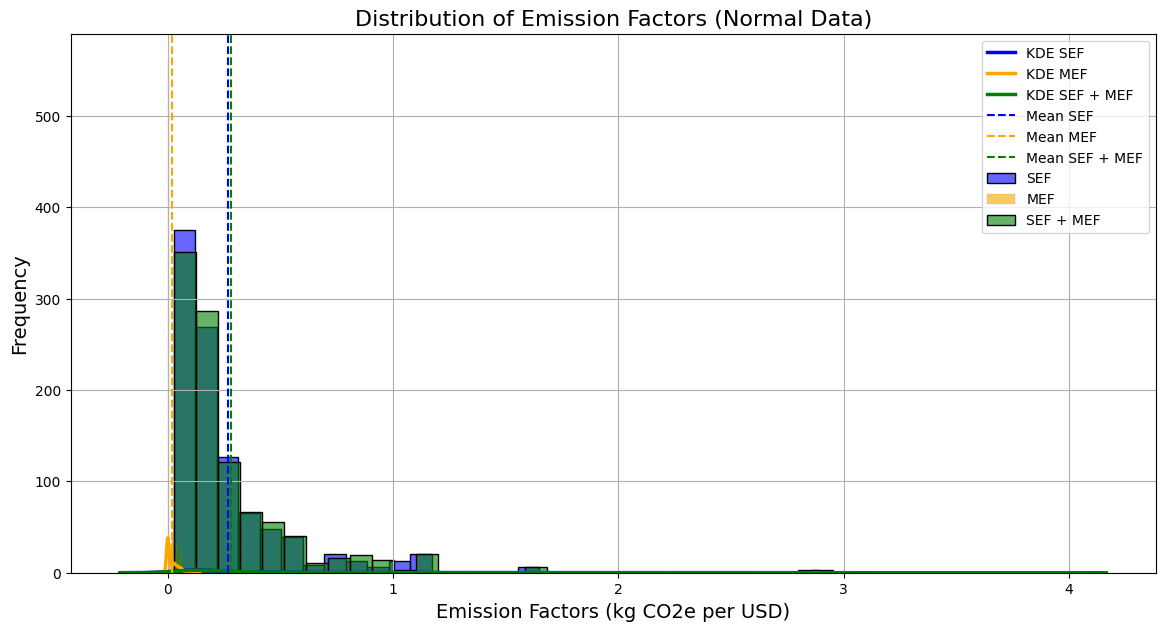

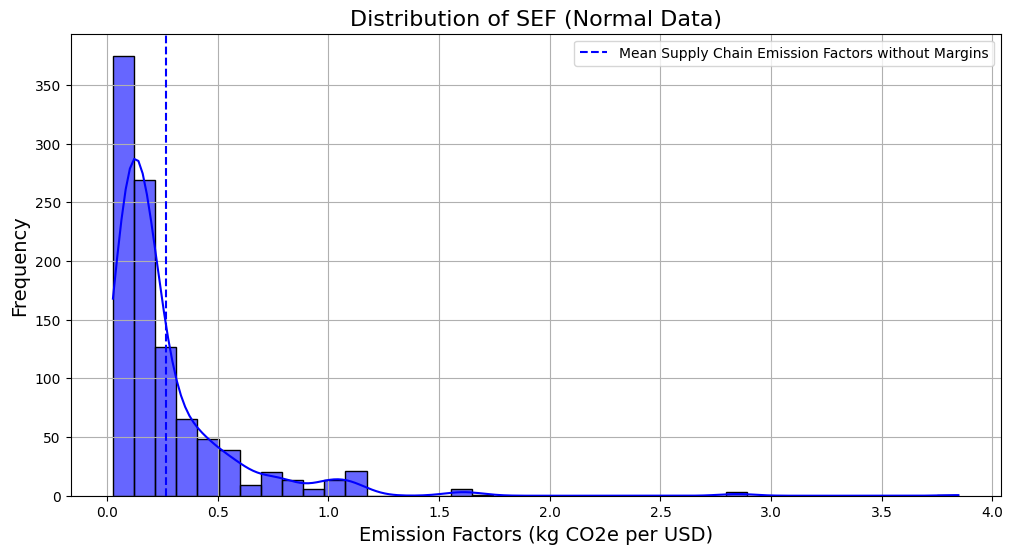

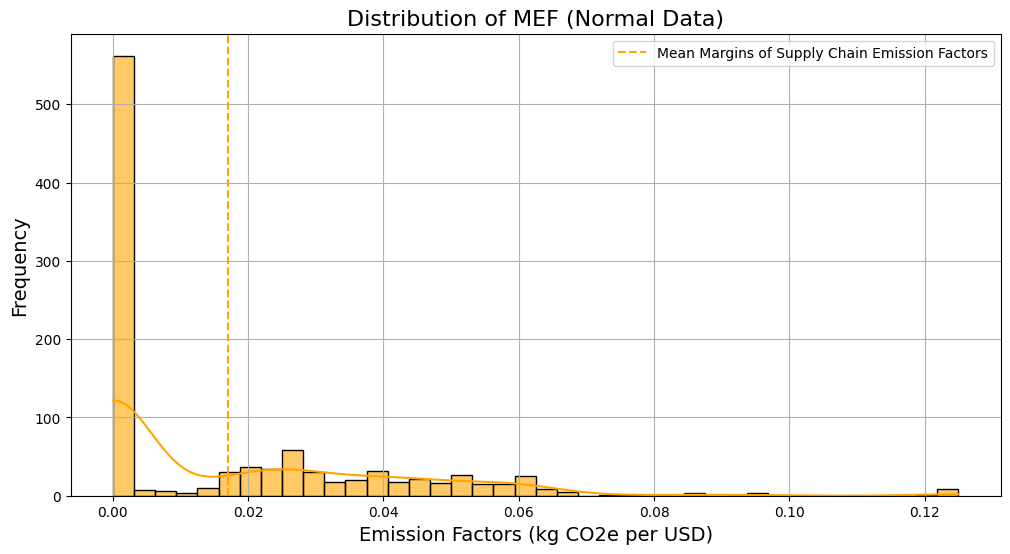

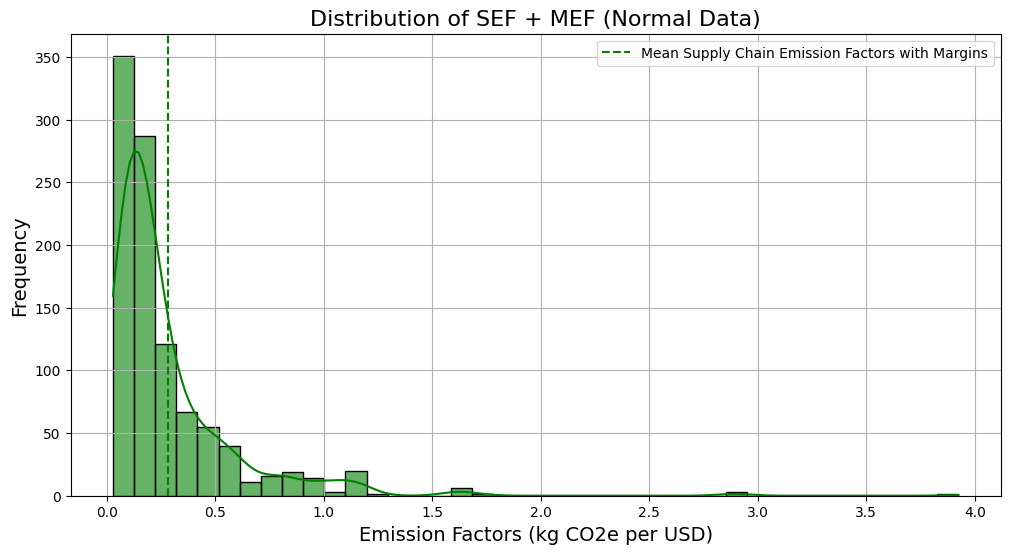

Visualizations for Log-Transformed Data


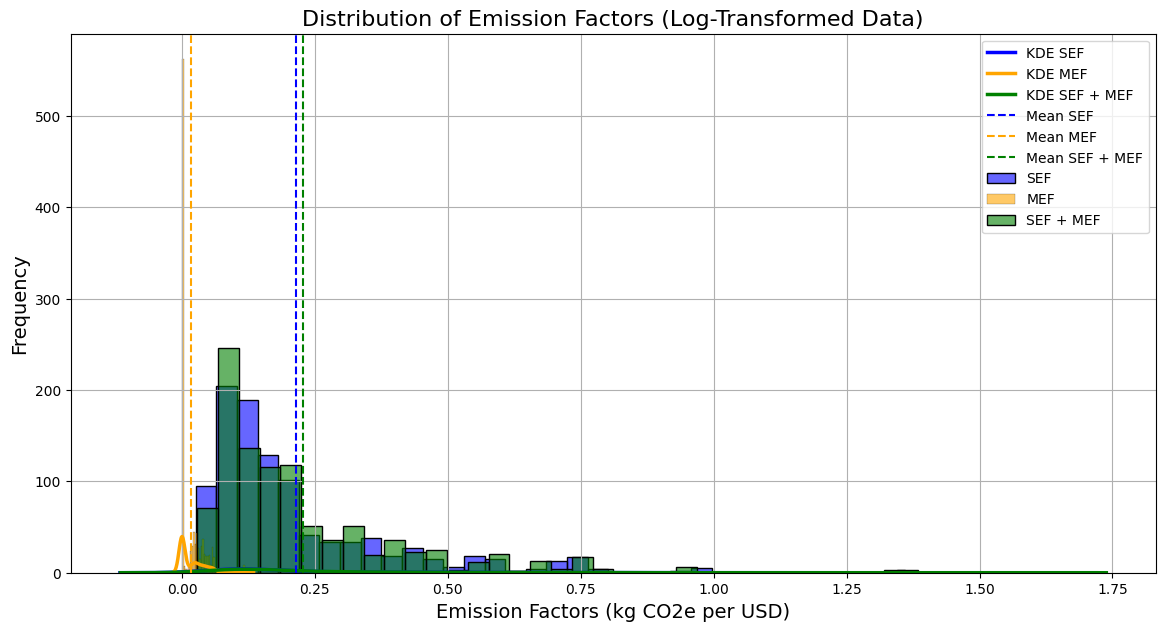

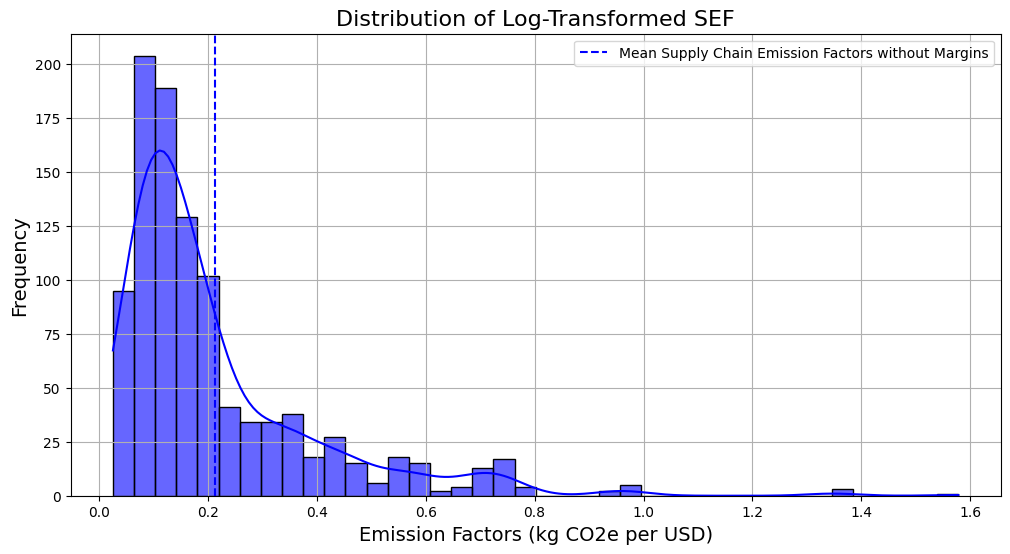

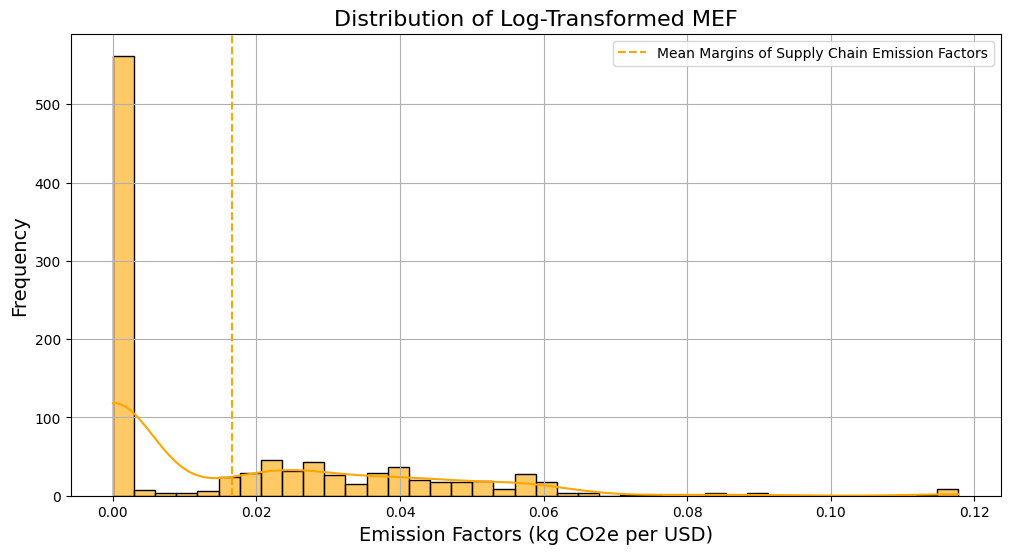

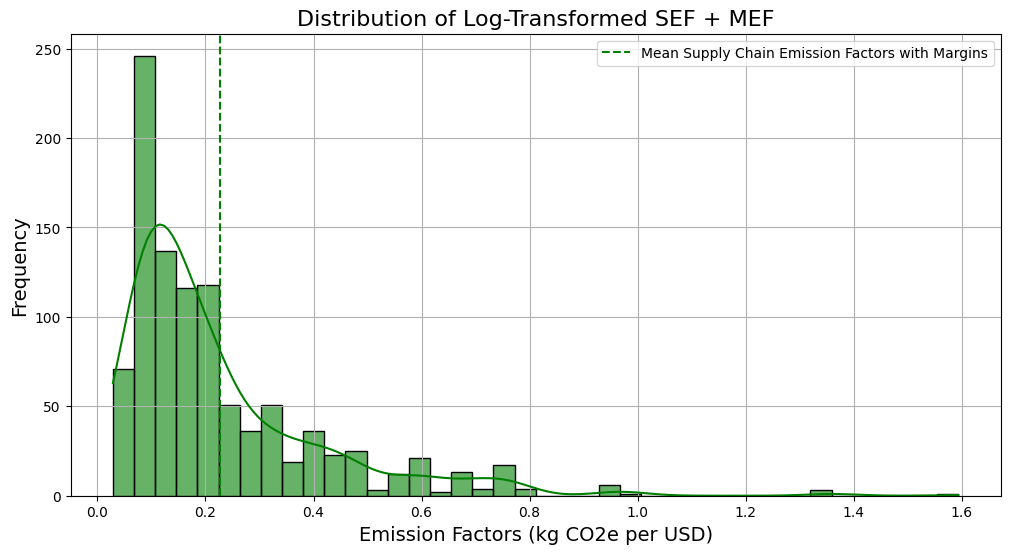

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load the Data
file_path = "/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv"
df = pd.read_csv(file_path)

# Step 2: Clean Column Names
df.columns = df.columns.str.strip()

# Step 3: Define Numeric Columns for Analysis
numeric_cols = [
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors',
    'Supply Chain Emission Factors with Margins'
]

# Convert numeric columns to float
df[numeric_cols] = df[numeric_cols].astype(float)

# Step 4: Log Transformation
df_log = df[numeric_cols].apply(lambda x: np.log1p(x))  # Log transformation using log1p to handle zero values

# Define parameters for visualization
bin_size = 40  # Larger bin size for smoother histograms
alpha_value = 0.6  # Transparency for overlapping histograms
line_width = 2.5  # Line thickness for KDE plots

# Function to plot combined distribution with enhancements
def plot_combined_distribution(data, title):
    plt.figure(figsize=(14, 7))
    sns.histplot(data['Supply Chain Emission Factors without Margins'], bins=bin_size, kde=False, color='blue', alpha=alpha_value, label='SEF')
    sns.histplot(data['Margins of Supply Chain Emission Factors'], bins=bin_size, kde=False, color='orange', alpha=alpha_value, label='MEF')
    sns.histplot(data['Supply Chain Emission Factors with Margins'], bins=bin_size, kde=False, color='green', alpha=alpha_value, label='SEF + MEF')

    # KDE plots
    sns.kdeplot(data['Supply Chain Emission Factors without Margins'], color='blue', linewidth=line_width, label='KDE SEF')
    sns.kdeplot(data['Margins of Supply Chain Emission Factors'], color='orange', linewidth=line_width, label='KDE MEF')
    sns.kdeplot(data['Supply Chain Emission Factors with Margins'], color='green', linewidth=line_width, label='KDE SEF + MEF')

    # Mean lines
    plt.axvline(data['Supply Chain Emission Factors without Margins'].mean(), color='blue', linestyle='--', linewidth=1.5, label='Mean SEF')
    plt.axvline(data['Margins of Supply Chain Emission Factors'].mean(), color='orange', linestyle='--', linewidth=1.5, label='Mean MEF')
    plt.axvline(data['Supply Chain Emission Factors with Margins'].mean(), color='green', linestyle='--', linewidth=1.5, label='Mean SEF + MEF')

    # Plot formatting
    plt.title(title, fontsize=16)
    plt.xlabel("Emission Factors (kg CO2e per USD)", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to plot individual distributions
def plot_individual_distribution(data, column, color, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], bins=bin_size, kde=True, color=color, alpha=alpha_value)
    plt.axvline(data[column].mean(), color=color, linestyle='--', linewidth=1.5, label=f'Mean {column}')
    plt.title(title, fontsize=16)
    plt.xlabel("Emission Factors (kg CO2e per USD)", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 5: Plot Normal Data (Combined and Separate)
print("Visualizations for Normal Data")

# Combined plot for normal data
plot_combined_distribution(df, "Distribution of Emission Factors (Normal Data)")

# Separate plots for SEF, MEF, and SEF + MEF
plot_individual_distribution(df, 'Supply Chain Emission Factors without Margins', 'blue', 'Distribution of SEF (Normal Data)')
plot_individual_distribution(df, 'Margins of Supply Chain Emission Factors', 'orange', 'Distribution of MEF (Normal Data)')
plot_individual_distribution(df, 'Supply Chain Emission Factors with Margins', 'green', 'Distribution of SEF + MEF (Normal Data)')

# Step 6: Plot Log-Transformed Data (Combined and Separate)
print("Visualizations for Log-Transformed Data")

# Combined plot for log-transformed data
plot_combined_distribution(df_log, "Distribution of Emission Factors (Log-Transformed Data)")

# Separate plots for log-transformed SEF, MEF, and SEF + MEF
plot_individual_distribution(df_log, 'Supply Chain Emission Factors without Margins', 'blue', 'Distribution of Log-Transformed SEF')
plot_individual_distribution(df_log, 'Margins of Supply Chain Emission Factors', 'orange', 'Distribution of Log-Transformed MEF')
plot_individual_distribution(df_log, 'Supply Chain Emission Factors with Margins', 'green', 'Distribution of Log-Transformed SEF + MEF')


In [ ]:
# Step 6: Correlation Analysis
correlation_matrix = df[numeric_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                               Supply Chain Emission Factors without Margins  \
Supply Chain Emission Factors without Margins                                       1.000000   
Margins of Supply Chain Emission Factors                                            0.249769   
Supply Chain Emission Factors with Margins                                          0.997525   

                                               Margins of Supply Chain Emission Factors  \
Supply Chain Emission Factors without Margins                                  0.249769   
Margins of Supply Chain Emission Factors                                       1.000000   
Supply Chain Emission Factors with Margins                                     0.317226   

                                               Supply Chain Emission Factors with Margins  
Supply Chain Emission Factors without Margins                                    0.997525  
Margins of Supply Chain Emission Factors     

Deep Neural Decision Forest

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0692 - val_loss: 0.0072
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0173 - val_loss: 0.0045
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0094 - val_loss: 0.0015
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - val_loss: 0.0010
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0055 - val_loss: 0.0011
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0011
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - val_loss: 8.3587e-04
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - val_loss: 2.1413e-04
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0037 - val_loss: 4.4383e-04
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 6.4866e-04
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 2.8542e-04
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s

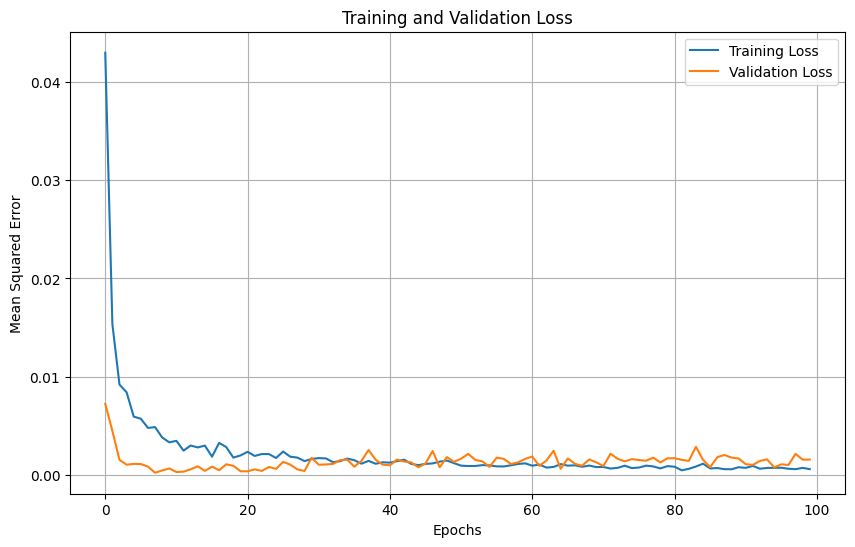

Features: 2, Feature Importances: 16
Error: The number of features does not match the length of the feature importance array.


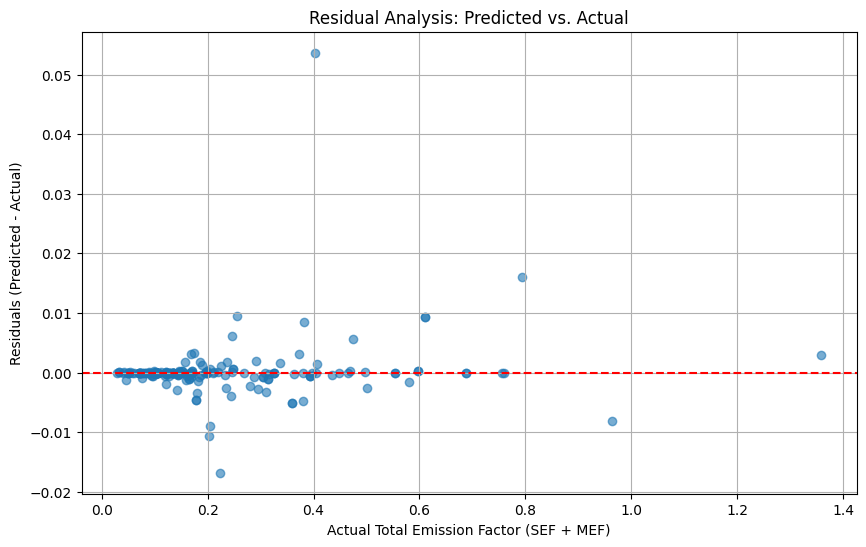

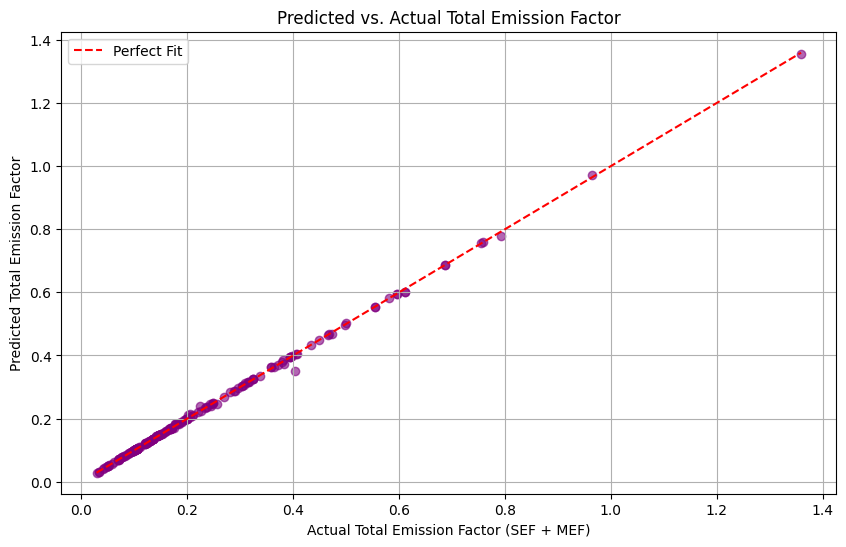

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 1: Load and Preprocess the Data
file_path = "/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv"
df = pd.read_csv(file_path)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Define numeric columns and target variable
numeric_cols = [
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors'
]
target_col = 'Supply Chain Emission Factors with Margins'

# Log transformation
df[numeric_cols] = df[numeric_cols].apply(lambda x: np.log1p(x))
df[target_col] = np.log1p(df[target_col])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_cols])
y = df[target_col].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the Deep Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Regression output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# Step 3: Extract Learned Features from the Neural Network
feature_extractor = Sequential(model.layers[:-1])  # Remove the last layer
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 4: Train a Decision Forest on the Learned Features
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_features, y_train)

# Step 5: Make Predictions and Evaluate the Model
y_pred = forest.predict(X_test_features)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Step 6: Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Feature Importance Analysis
# Correct feature names and ensure matching shapes
features = ['SEF (Without Margins)', 'MEF (Margins)']
feature_importances = forest.feature_importances_

# Check the shapes of features and importance values
print(f"Features: {len(features)}, Feature Importances: {len(feature_importances)}")

# Plot feature importance
if len(features) == len(feature_importances):
    plt.figure(figsize=(8, 6))
    plt.barh(features, feature_importances, color='skyblue')
    plt.title("Feature Importance in Predicting Total Emission Factor")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.grid(True)
    plt.show()
else:
    print("Error: The number of features does not match the length of the feature importance array.")

# Step 8: Residual Analysis
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Analysis: Predicted vs. Actual")
plt.xlabel("Actual Total Emission Factor (SEF + MEF)")
plt.ylabel("Residuals (Predicted - Actual)")
plt.grid(True)
plt.show()

# Step 9: Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title("Predicted vs. Actual Total Emission Factor")
plt.xlabel("Actual Total Emission Factor (SEF + MEF)")
plt.ylabel("Predicted Total Emission Factor")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0995 - val_loss: 0.0218
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0214 - val_loss: 0.0036
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - val_loss: 0.0019
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0079 - val_loss: 0.0012
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - val_loss: 0.0010
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - val_loss: 8.2318e-04
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - val_loss: 5.6395e-04
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - val_loss: 8.2366e-04
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - val_loss: 4.9786e-04
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0036 - val_loss: 2.9219e-04
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

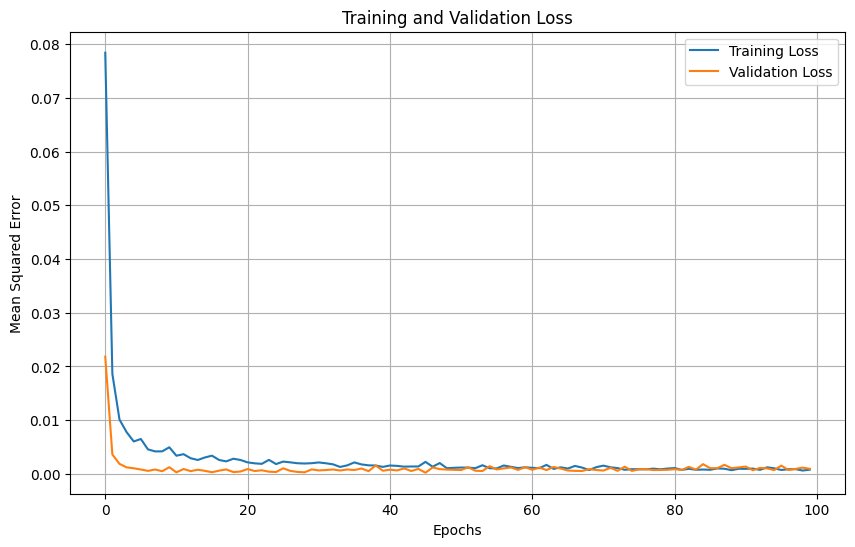

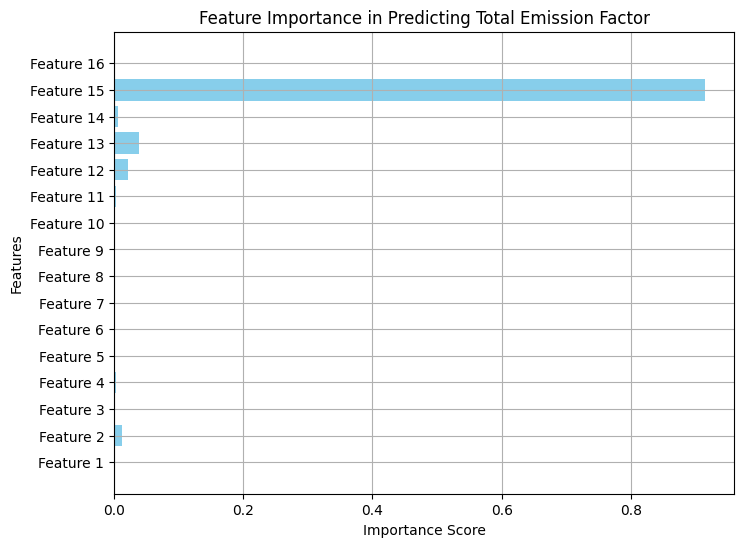

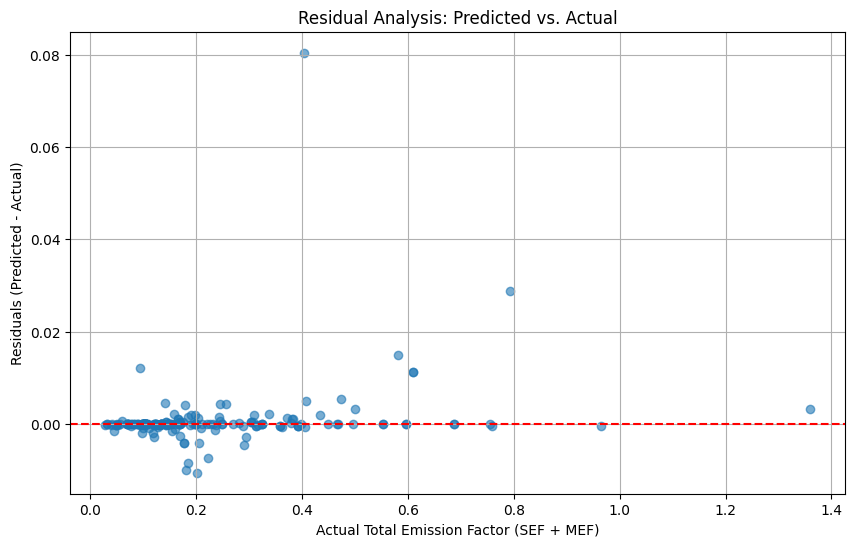

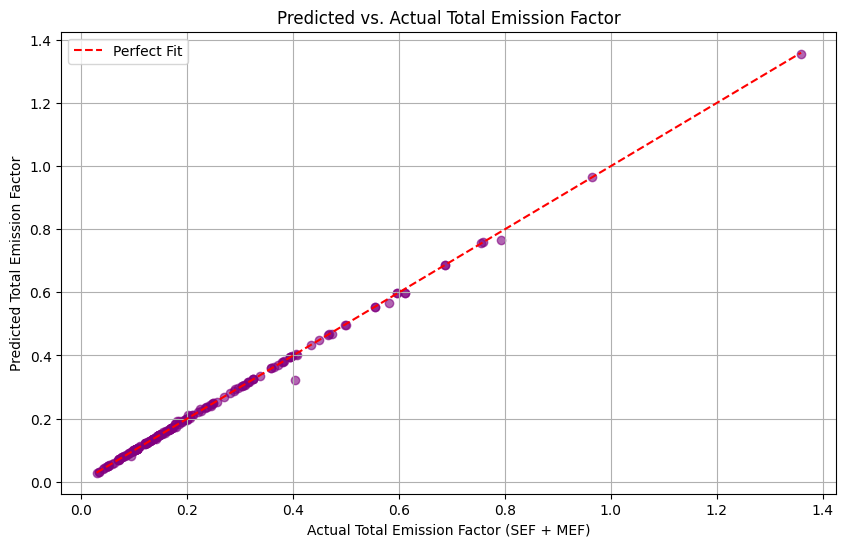

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Step 1: Load and Preprocess the Data
file_path = "/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv"
df = pd.read_csv(file_path)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Define numeric columns and target variable
numeric_cols = [
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors'
]
target_col = 'Supply Chain Emission Factors with Margins'

# Log transformation
df[numeric_cols] = df[numeric_cols].apply(lambda x: np.log1p(x))
df[target_col] = np.log1p(df[target_col])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_cols])
y = df[target_col].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the Deep Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Regression output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# Step 3: Extract Learned Features from the Neural Network
feature_extractor = Sequential(model.layers[:-1])  # Remove the last layer
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 4: Train a Decision Forest on the Learned Features
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_features, y_train)

# Step 5: Make Predictions and Evaluate the Model
y_pred = forest.predict(X_test_features)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Step 6: Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Updated Feature Importance Analysis
feature_importances = forest.feature_importances_
num_features = len(feature_importances)
features = [f'Feature {i+1}' for i in range(num_features)]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importance in Predicting Total Emission Factor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()

# Step 8: Residual Analysis
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Analysis: Predicted vs. Actual")
plt.xlabel("Actual Total Emission Factor (SEF + MEF)")
plt.ylabel("Residuals (Predicted - Actual)")
plt.grid(True)
plt.show()

# Step 9: Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title("Predicted vs. Actual Total Emission Factor")
plt.xlabel("Actual Total Emission Factor (SEF + MEF)")
plt.ylabel("Predicted Total Emission Factor")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0936 - val_loss: 0.0139
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0147 - val_loss: 0.0047
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 0.0039
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - val_loss: 0.0020
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - val_loss: 0.0025
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0058 - val_loss: 0.0020
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 0.0017
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - val_loss: 0.0025
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039 - val_loss: 0.0024
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

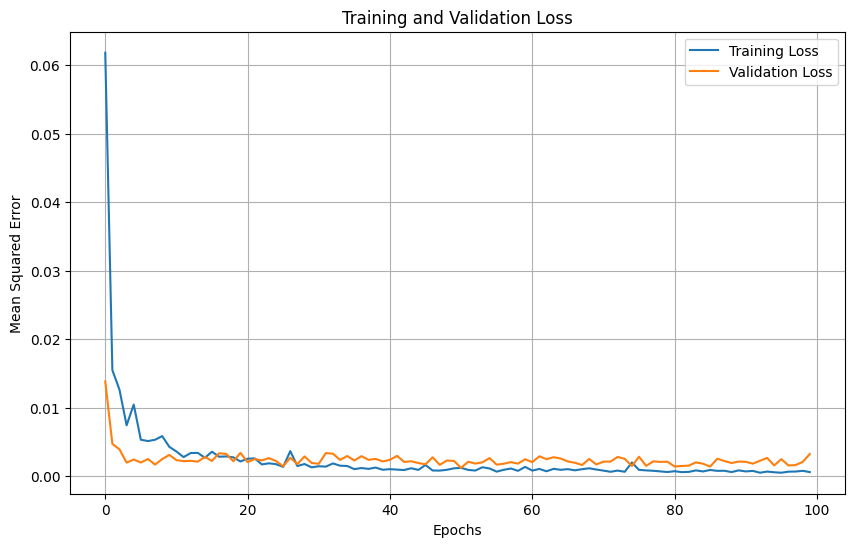

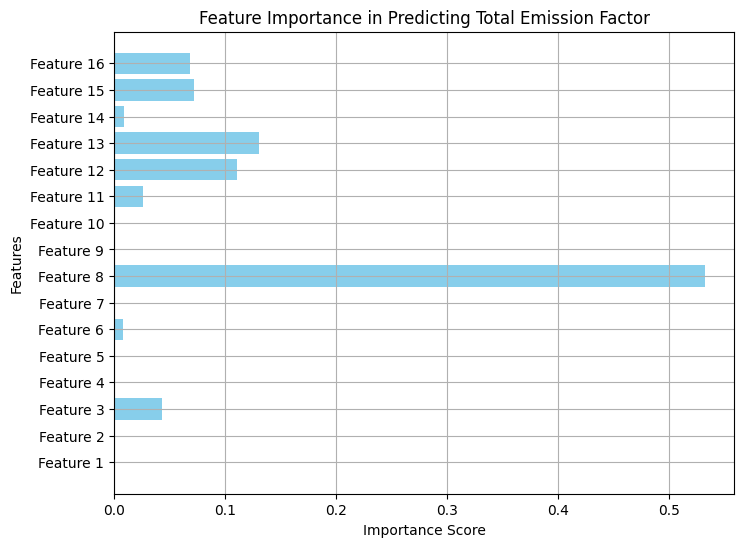

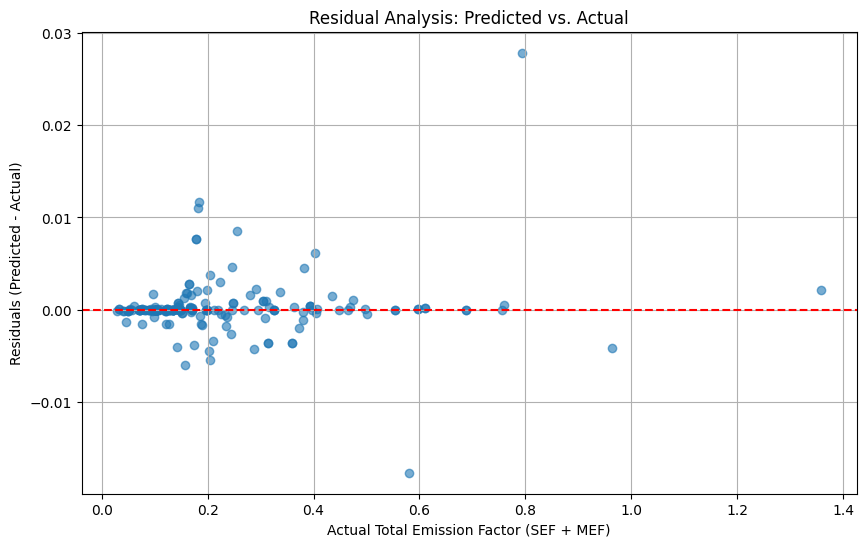

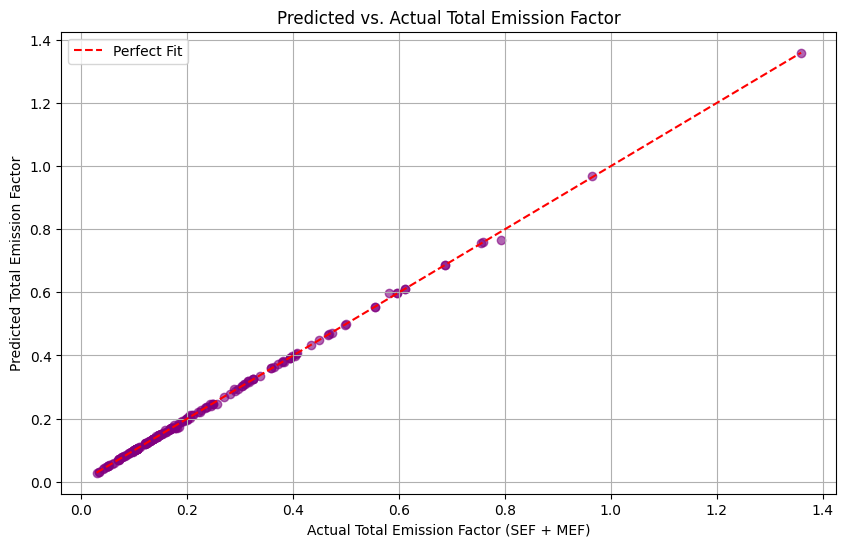

interactive(children=(FloatSlider(value=0.5, description='sef', max=1.0, step=0.01), FloatSlider(value=0.25, d…

<function __main__.interactive_prediction(sef, mef)>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import joblib
from ipywidgets import interact

# Step 1: Load and Preprocess the Data
file_path = "/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Define numeric columns and target variable
numeric_cols = [
    'Supply Chain Emission Factors without Margins',
    'Margins of Supply Chain Emission Factors'
]
target_col = 'Supply Chain Emission Factors with Margins'

# Log transformation of the input features and target
df[numeric_cols] = df[numeric_cols].apply(lambda x: np.log1p(x))
df[target_col] = np.log1p(df[target_col])

# Standardize the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_cols])
y = df[target_col].values

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the Deep Neural Network Model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use explicit Input layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')  # Output layer for regression
])

# Compile the model using 'mean_squared_error' as a string
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# Save the model using the Keras format
model.save("dnn_model.keras")

# Step 3: Extract Learned Features from the Neural Network
feature_extractor = Sequential(model.layers[:-1])
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Step 4: Train a Random Forest Regressor on the Learned Features
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_features, y_train)

# Save the Random Forest model
joblib.dump(forest, "random_forest_model.pkl")

# Step 5: Model Evaluation
y_pred = forest.predict(X_test_features)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Step 6: Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Feature Importance Analysis
feature_importances = forest.feature_importances_
num_features = len(feature_importances)
features = [f'Feature {i+1}' for i in range(num_features)]

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title("Feature Importance in Predicting Total Emission Factor")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.grid(True)
plt.show()

# Step 8: Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Analysis: Predicted vs. Actual")
plt.xlabel("Actual Total Emission Factor (SEF + MEF)")
plt.ylabel("Residuals (Predicted - Actual)")
plt.grid(True)
plt.show()

# Step 9: Predicted vs. Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Fit')
plt.title("Predicted vs. Actual Total Emission Factor")
plt.xlabel("Actual Total Emission Factor (SEF + MEF)")
plt.ylabel("Predicted Total Emission Factor")
plt.legend()
plt.grid(True)
plt.show()

# Step 10: Interactive Prediction Function using `interact`
def interactive_prediction(sef, mef):
    user_input = np.array([[sef, mef]])
    scaler = joblib.load("scaler.pkl")
    scaled_input = scaler.transform(user_input)

    # Load the neural network model and extract features
    dnn_model = tf.keras.models.load_model("dnn_model.keras")
    learned_features = dnn_model.predict(scaled_input)

    # Load the Random Forest model and make predictions
    forest_model = joblib.load("random_forest_model.pkl")
    prediction = forest_model.predict(learned_features)

    # Display the prediction result
    print(f"\nPredicted Total Emission Factor (SEF + MEF): {prediction[0]:.4f}")

# Use `interact` to create interactive sliders for SEF and MEF input
interact(interactive_prediction, sef=(0.0, 1.0, 0.01), mef=(0.0, 0.5, 0.01))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
import joblib
from ipywidgets import interact

# Step 1: Load and Preprocess the Data
file_path = "/content/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_CO2e_USD2022.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# Define numeric columns and target variable
numeric_cols = ['Supply Chain Emission Factors without Margins', 'Margins of Supply Chain Emission Factors']
target_col = 'Supply Chain Emission Factors with Margins'

# Log transformation
df[numeric_cols] = df[numeric_cols].apply(lambda x: np.log1p(x))
df[target_col] = np.log1p(df[target_col])

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df[numeric_cols])
y = df[target_col].values

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define the Neural Network Model using Functional API
inputs = Input(shape=(X_train.shape[1],))
x = Dense(64, activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='linear')(x)

model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

# Save the model
model.save("dnn_model.keras")

# Step 3: Extract Learned Features from an Intermediate Layer
intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer(index=-3).output)
X_train_features = intermediate_layer_model.predict(X_train)
X_test_features = intermediate_layer_model.predict(X_test)

# Train Random Forest Regressor
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_features, y_train)

# Save the Random Forest model
joblib.dump(forest, "random_forest_model.pkl")

# Model Evaluation
y_pred = forest.predict(X_test_features)
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

# Interactive Prediction
def interactive_prediction(sef, mef):
    user_input = np.array([[sef, mef]])
    scaler = joblib.load("scaler.pkl")
    user_input_df = pd.DataFrame(user_input, columns=numeric_cols)
    scaled_input = scaler.transform(user_input_df)

    dnn_model = tf.keras.models.load_model("dnn_model.keras")
    intermediate_layer_model = Model(inputs=dnn_model.input, outputs=dnn_model.get_layer(index=-3).output)
    learned_features = intermediate_layer_model.predict(scaled_input).reshape(1, -1)

    forest_model = joblib.load("random_forest_model.pkl")
    prediction = forest_model.predict(learned_features)
    print(f"\nPredicted Total Emission Factor: {prediction[0]:.4f}")

# Use interact for user input
interact(interactive_prediction, sef=(0.0, 1.0, 0.01), mef=(0.0, 0.5, 0.01))


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1287 - val_loss: 0.0057
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0144 - val_loss: 0.0029
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0095 - val_loss: 0.0024
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0088 - val_loss: 0.0017
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - val_loss: 8.2535e-04
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0070 - val_loss: 0.0011
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val_loss: 4.8977e-04
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0054 - val_loss: 7.5848e-04
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0044 - val_loss: 0.0016
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0049 - val_loss: 3.2101e-04
Epoch 11/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0073 - val_loss: 5.3461e-04
Epoch 12/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s

interactive(children=(FloatSlider(value=0.5, description='sef', max=1.0, step=0.01), FloatSlider(value=0.25, d…

<function __main__.interactive_prediction(sef, mef)>